In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
import os
import pickle

from brian2 import *
from brian2tools import *

import matplotlib.pyplot as plt
import scipy

import cx_rate
import trials
import plotter
import bee_simulator

In [2]:
from cx_spiking.central_complex import CX_SPIKING
from cx_spiking.constants import *
import cx_spiking 

In [3]:
######################################
### INPUTS
######################################
route_file = os.path.join(os.environ.get('MSC_PROJECT'), 'notebooks/data/route.npz')
T_outbound = 1500
T_inbound = 1500
T = T_outbound+T_inbound

######################################
### SPIKING CX
######################################
mem_gain_outbound_1 = 0.05
decay_outbound_1 = 0.025
mem_gain_inbound_1 = 0.05
decay_inbound_1 = 0.033

mem_gain_outbound_2 = 0.1
decay_outbound_2 = 1.25
mem_gain_inbound_2 = 0.1
decay_inbound_2 = 1

rotation_factor = 0.1

In [4]:
for experiment in range(1):
    h, v, = cx_spiking.inputs.generate_route(T_outbound=1500, vary_speed=True)#, route_file=route_file, load_route=True)

    ######################################
    ### RATE BASED CX
    ######################################
    noise = 0.1
    cx = cx_rate.CXRatePontin(noise=noise)

    h, v, cx_log, cpu4_snapshot = trials.run_trial(logging=True,
                                                   T_outbound=T_outbound,
                                                   T_inbound=T_inbound,
                                                   noise=noise,
                                                   cx=cx,
                                                   route=(h[:T_outbound], v[:T_outbound]))

    #######################
    #### CPU4 METHOD 1
    #######################
    spiking_cx_vm = CX_SPIKING(eqs, threshold_eqs, reset_eqs,
                               h, v, 
                               mem_gain_outbound_1, decay_outbound_1, mem_gain_inbound_1, decay_inbound_1,
                               rotation_factor, time_step=20, T_outbound=T_outbound,
                               T_inbound=T_inbound, 
                               headings_method='vonmises', cpu4_method=1,
                               only_tuned_network=True)
    spiking_cx_cos = CX_SPIKING(eqs, threshold_eqs, reset_eqs,
                                h, v, 
                                mem_gain_outbound_1, decay_outbound_1, mem_gain_inbound_1, decay_inbound_1,
                                rotation_factor, time_step=20, T_outbound=T_outbound,
                                T_inbound=T_inbound, 
                                headings_method='cosine', cpu4_method=1,
                                only_tuned_network=True)

    spiking_cx_vm.run_outbound()
    spiking_cx_cos.run_outbound()

    to_save = {}
    to_save['h'] = h
    to_save['v'] = v
    to_save['cx_log'] = cx_log
    to_save['spiking_cx_vm'] = spiking_cx_vm.extract_data()
    to_save['spiking_cx_cos'] = spiking_cx_cos.extract_data()
    with open(os.path.join(os.environ.get('MSC_PROJECT'), f'notebooks/vonmises_vs_cosine/exp_{experiment}_cpu4_1.pickle'), 'wb') as fh:
        pickle.dump(to_save, fh, protocol=3)

    #######################
    #### CPU4 METHOD 2
    #######################
    spiking_cx_vm = CX_SPIKING(eqs, threshold_eqs, reset_eqs,
                               h, v, 
                               mem_gain_outbound_2, decay_outbound_2, mem_gain_inbound_2, decay_inbound_2,
                               rotation_factor, time_step=20, T_outbound=T_outbound,
                               T_inbound=T_inbound, 
                               headings_method='vonmises', cpu4_method=2,
                               only_tuned_network=True)
    spiking_cx_cos = CX_SPIKING(eqs, threshold_eqs, reset_eqs,
                                h, v, 
                                mem_gain_outbound_2, decay_outbound_2, mem_gain_inbound_2, decay_inbound_2,
                                rotation_factor, time_step=20, T_outbound=T_outbound,
                                T_inbound=T_inbound, 
                                headings_method='cosine', cpu4_method=2,
                                only_tuned_network=True)

    spiking_cx_vm.run_outbound()
    spiking_cx_cos.run_outbound()
    to_save = {}
    to_save['h'] = h
    to_save['v'] = v
    to_save['cx_log'] = cx_log
    to_save['spiking_cx_vm'] = spiking_cx_vm.extract_data()
    to_save['spiking_cx_cos'] = spiking_cx_cos.extract_data()
    with open(os.path.join(os.environ.get('MSC_PROJECT'), f'notebooks/vonmises_vs_cosine/experiments/exp_{experiment}_cpu4_2.pickle'), 'wb') as fh:
        pickle.dump(to_save, fh, protocol=3)



    
#     plt.figure(figsize=(8,8))
#     plt.text(0, 0, 'N', fontsize=12, fontweight='heavy', color='k', ha='center', va='center')
#     plt.plot(spiking_cx_vm.bee_coords[:spiking_cx_vm.T_outbound,0], spiking_cx_vm.bee_coords[:spiking_cx_vm.T_outbound,1], color='red', lw=1, label='vonMises Outbound')
#     plt.plot(spiking_cx_cos.bee_coords[:spiking_cx_cos.T_outbound,0], spiking_cx_cos.bee_coords[:spiking_cx_cos.T_outbound,1], color='green', lw=1, label='cosine Outbound')
#     plt.legend()
#     plt.axis('scaled')
#     plt.show()


Generating route of length 1500 and vary_speed=True
Run network outbound for 1500 steps
Starting simulation at t=0. s for a duration of 30. s
3.7565 s (12%) simulated in 10s, estimated 1m 10s remaining.
7.6219 s (25%) simulated in 20s, estimated 59s remaining.
11.7578 s (39%) simulated in 30s, estimated 47s remaining.
15.6343 s (52%) simulated in 40s, estimated 37s remaining.
19.6508 s (65%) simulated in 50s, estimated 26s remaining.
23.6229 s (78%) simulated in 1m 0s, estimated 16s remaining.
27.6827 s (92%) simulated in 1m 10s, estimated 6s remaining.
30. s (100%) simulated in 1m 15s
Run network outbound for 1500 steps
Starting simulation at t=0. s for a duration of 30. s
4.1609 s (13%) simulated in 10s, estimated 1m 2s remaining.
7.7975 s (25%) simulated in 20s, estimated 57s remaining.
11.583 s (38%) simulated in 30s, estimated 48s remaining.
15.7381 s (52%) simulated in 40s, estimated 36s remaining.
19.6718 s (65%) simulated in 50s, estimated 26s remaining.
23.415 s (78%) simulate

NameError: name 'pickle' is not defined

NameError: name 'spiking_cx_cpu4_1' is not defined

In [19]:
import pickle
to_save = {}
to_save['h'] = h
to_save['v'] = v
to_save['spiking_cx_vm'] = spiking_cx_vm
to_save['spiking_cx_cos'] = spiking_cx_cos
with open(os.path.join(os.environ.get('MSC_PROJECT'), f'notebooks/vonmises_vs_cosine/exp_{experiment}_cpu4_1.pickle'), 'wb') as fh:
    pickle.dump(to_save, fh, protocol=3)



PicklingError: Can't pickle <class 'cx_spiking.central_complex.CX_SPIKING'>: it's not the same object as cx_spiking.central_complex.CX_SPIKING

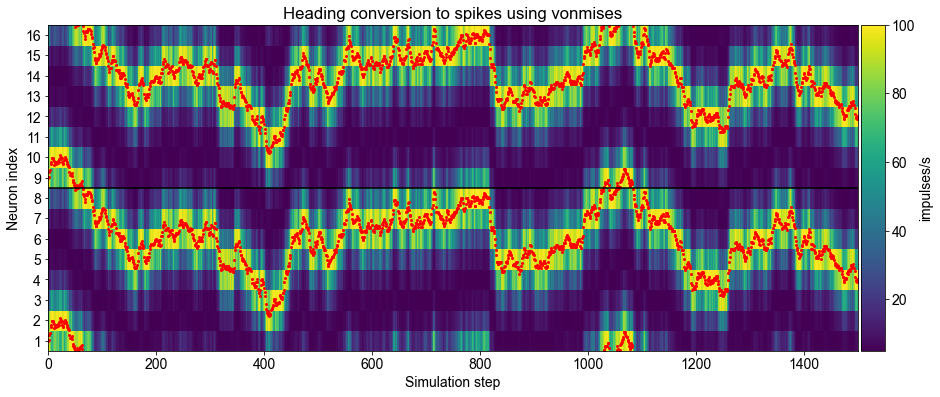

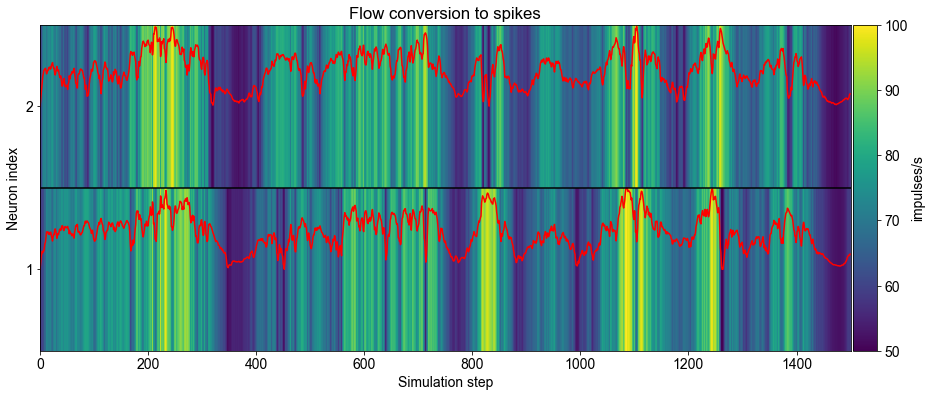

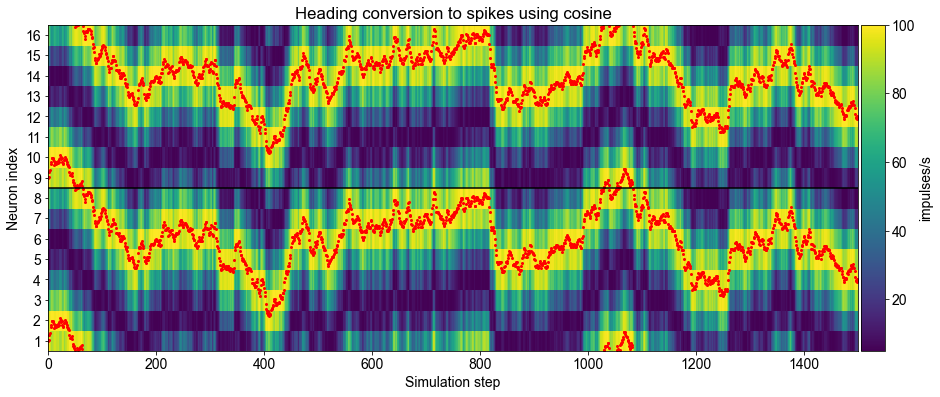

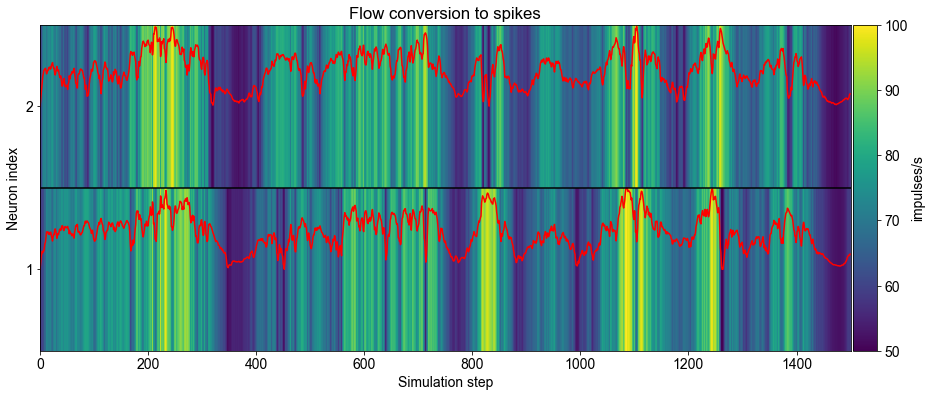

In [12]:
cx_spiking.plotting.plot_inputs_outbound(spiking_cx_vm, h, v)
cx_spiking.plotting.plot_inputs_outbound(spiking_cx_cos, h, v)

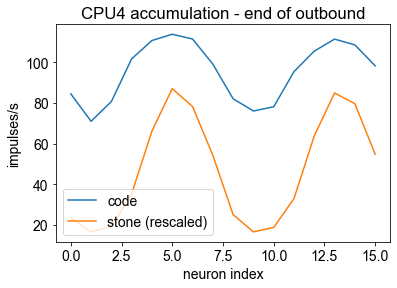

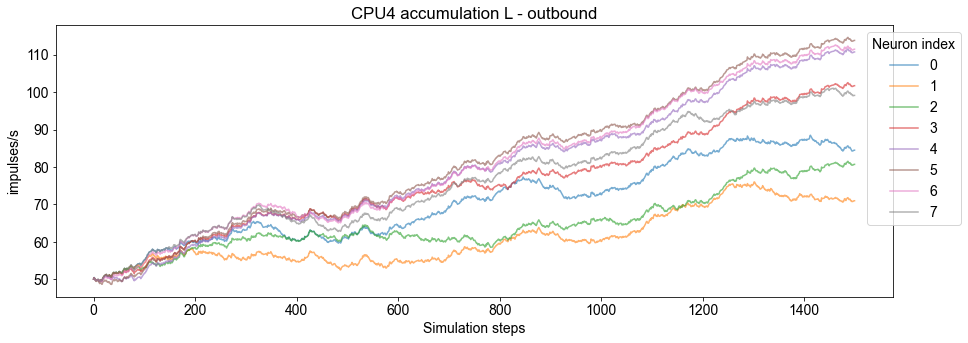

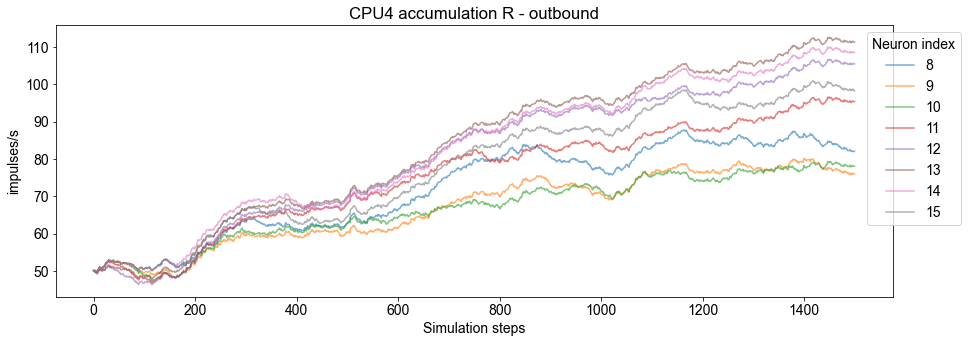

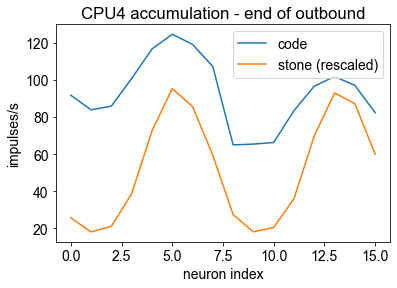

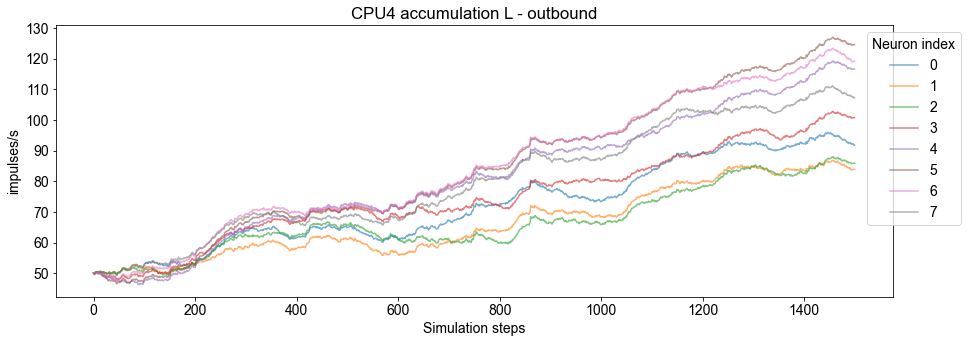

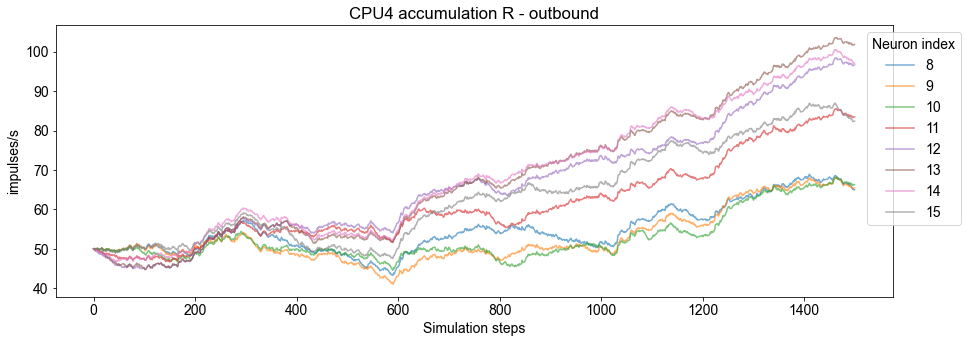

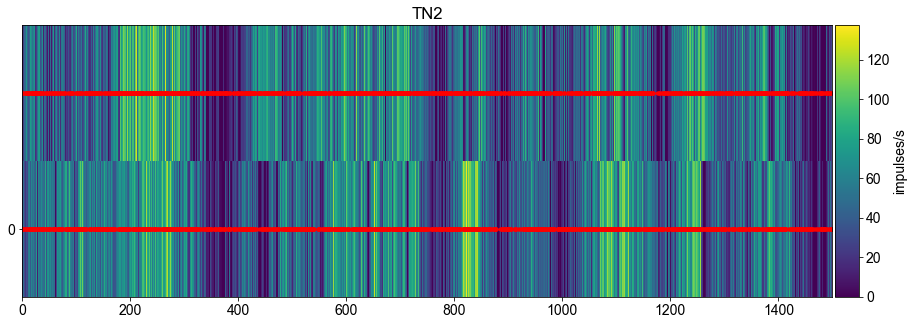

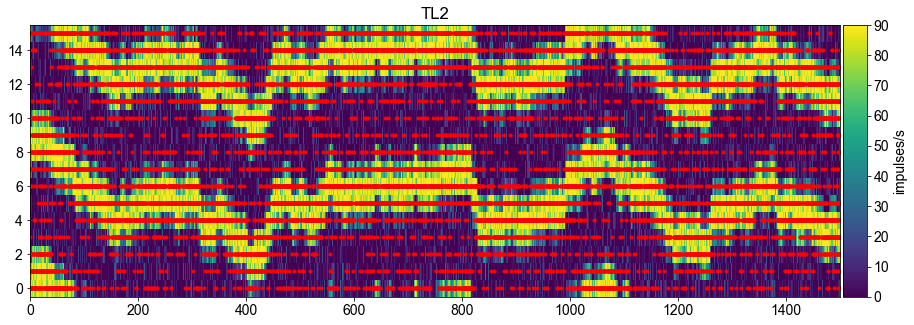

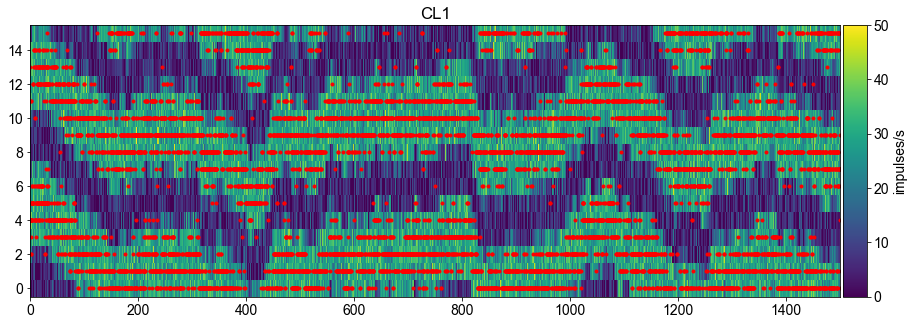

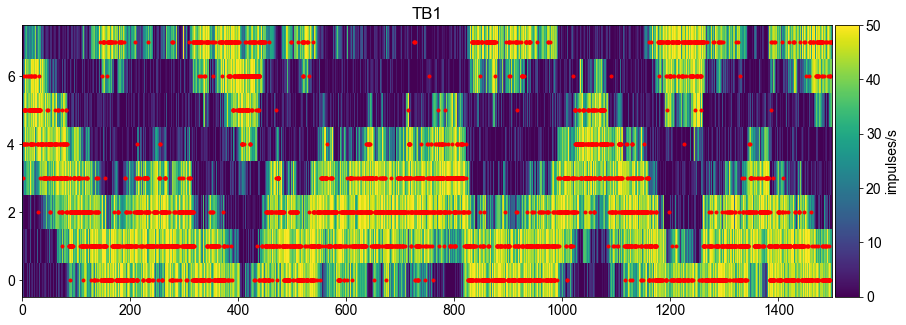

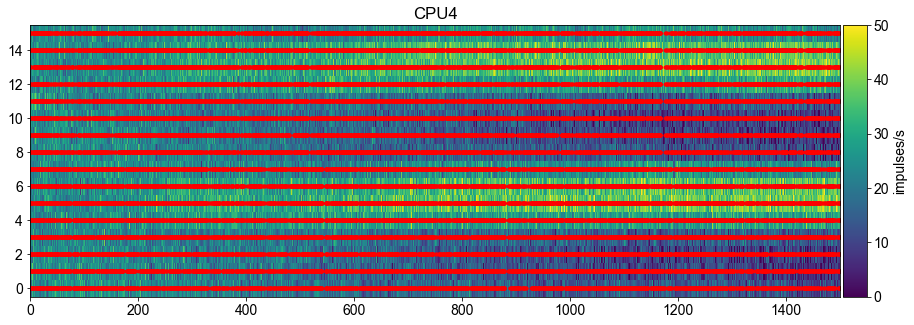

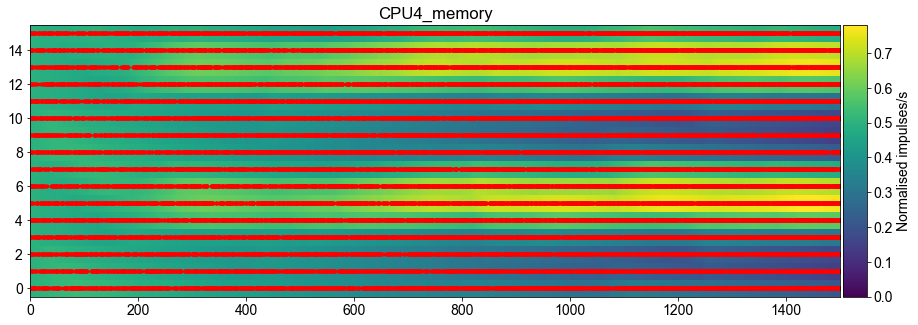

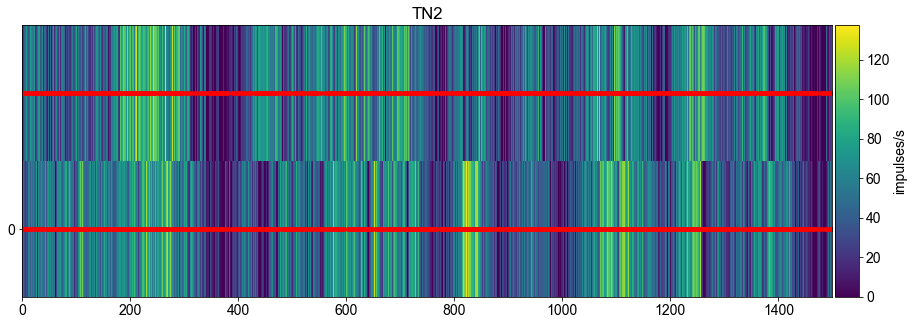

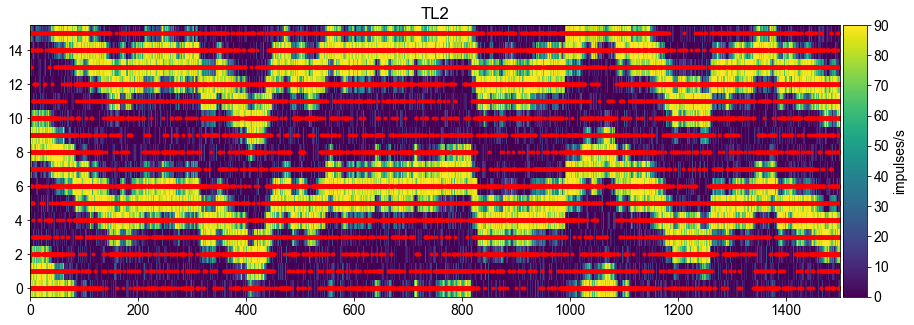

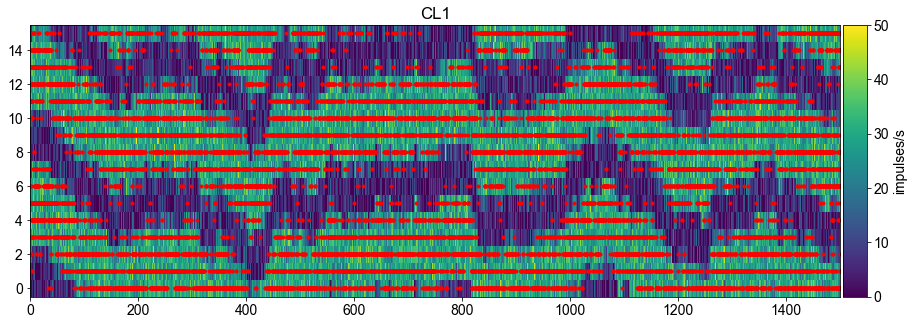

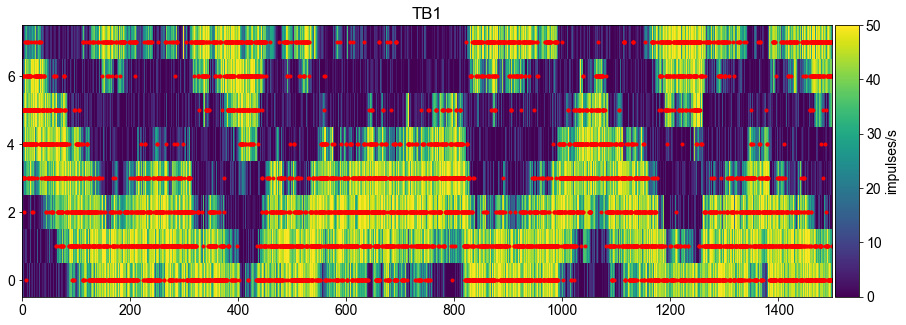

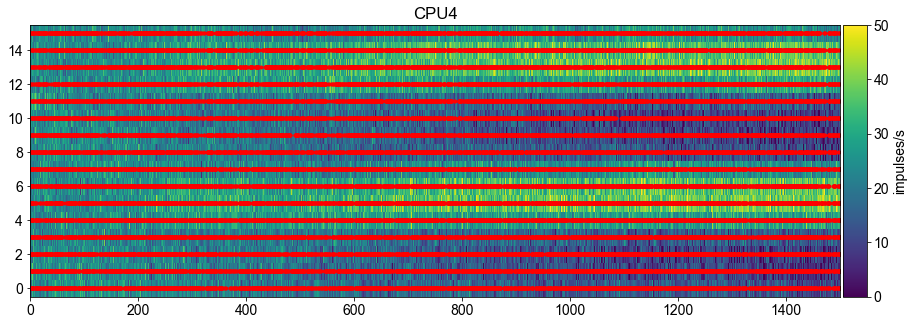

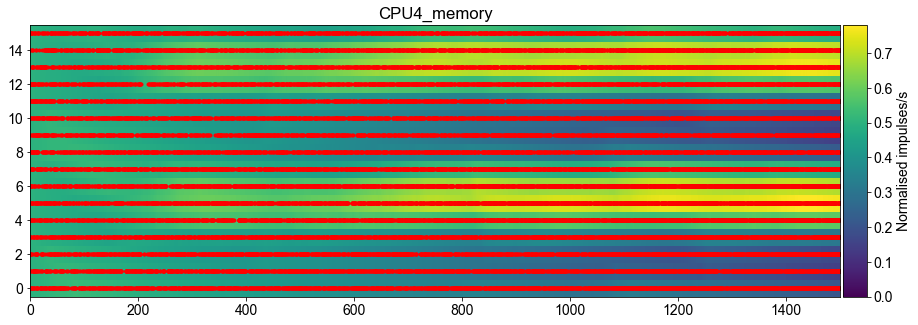

In [13]:
cx_spiking.plotting.plot_memory_outbound(spiking_cx_vm, cx_log)
cx_spiking.plotting.plot_memory_outbound(spiking_cx_cos, cx_log)

cx_spiking.plotting.plot_populations_outbound(spiking_cx_vm, cx_log)
cx_spiking.plotting.plot_populations_outbound(spiking_cx_cos, cx_log)